# Machine Learning Model For MOTOMIND AI

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('CarsDataset.csv')

In [25]:
df.head(5)  # Display the first few rows of the dataset

,S.no,Car Name,Car Company,Car Image,ARAI Mileage,Fuel Type,Engine Displacement,No. of Cylinders,Max Power,Max Torque,Seating Capacity,Transmission Type,Fuel Tank Capacity,Body Type,Price
0,1,Swift,Maruti,https://stimg.cardekho.com/images/carexteriori...,25.75 kmpl,Petrol,1197 cc,3,80.46bhp@5700rpm,111.7Nm@4300rpm,5,Automatic,37 Litres,Hatchback,Rs.6.49 - 9.64 Lakh
1,2,Ertiga,Maruti,https://foujiadda.in/admin/uploads/vehicle/ima...,20.3 kmpl,Petrol,1462 cc,4,101.64bhp@6000rpm,139Nm@4300rpm,7,Automatic,45 Litres,MUV,Rs.8.96 - 13.26 Lakh
2,3,Fronx,Maruti,https://images.timesdrive.in/photo/msid-151016...,20.01 kmpl,Petrol,998 cc,3,98.69bhp@5500rpm,147.6Nm@2000-4500rpm,5,Automatic,37 Litres,SUV,Rs.7.54 - 13.06 Lakh
3,4,Brezza,Maruti,https://www.rushlane.com/wp-content/uploads/20...,19.8 kmpl,Petrol,1462 cc,4,101.64bhp@6000rpm,136.8Nm@4400rpm,5,Automatic,48 Litres,SUV,Rs.8.69 - 14.14 Lakh
4,5,Dzire,Maruti,https://images.autox.com/uploads/cars/2024/11/...,25.71 kmpl,Petrol,1197 cc,3,80bhp@5700rpm,111.7Nm@4300rpm,5,Automatic,37 Litres,Sedan,Rs.6.84 - 10.19 Lakh


In [26]:
df.describe()  # Get a statistical summary of the dataset

,S.no,No. of Cylinders
count,34.000000,34.000000
mean,17.500000,3.705882
std,9.958246,0.629064
min,1.000000,3.000000
25%,9.250000,3.000000
50%,17.500000,4.000000
75%,25.750000,4.000000
max,34.000000,6.000000


In [27]:
df.info()  # Get information about the dataset, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   S.no                 34 non-null     int64 
 1   Car Name             34 non-null     object
 2   Car Company          34 non-null     object
 3   Car Image            34 non-null     object
 4   ARAI Mileage         34 non-null     object
 5   Fuel Type            34 non-null     object
 6   Engine Displacement  34 non-null     object
 7   No. of Cylinders     34 non-null     int64 
 8   Max Power            34 non-null     object
 9   Max Torque           34 non-null     object
 10  Seating Capacity     34 non-null     object
 11  Transmission Type    34 non-null     object
 12  Fuel Tank Capacity   34 non-null     object
 13  Body Type            34 non-null     object
 14  Price                34 non-null     object
dtypes: int64(2), object(13)
memory usage: 4.1+ KB


In [28]:
df.shape  # Get the No of Rows and Columns in dataset

(34, 15)

In [29]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

S.no                   0
Car Name               0
Car Company            0
Car Image              0
ARAI Mileage           0
Fuel Type              0
Engine Displacement    0
No. of Cylinders       0
Max Power              0
Max Torque             0
Seating Capacity       0
Transmission Type      0
Fuel Tank Capacity     0
Body Type              0
Price                  0
dtype: int64


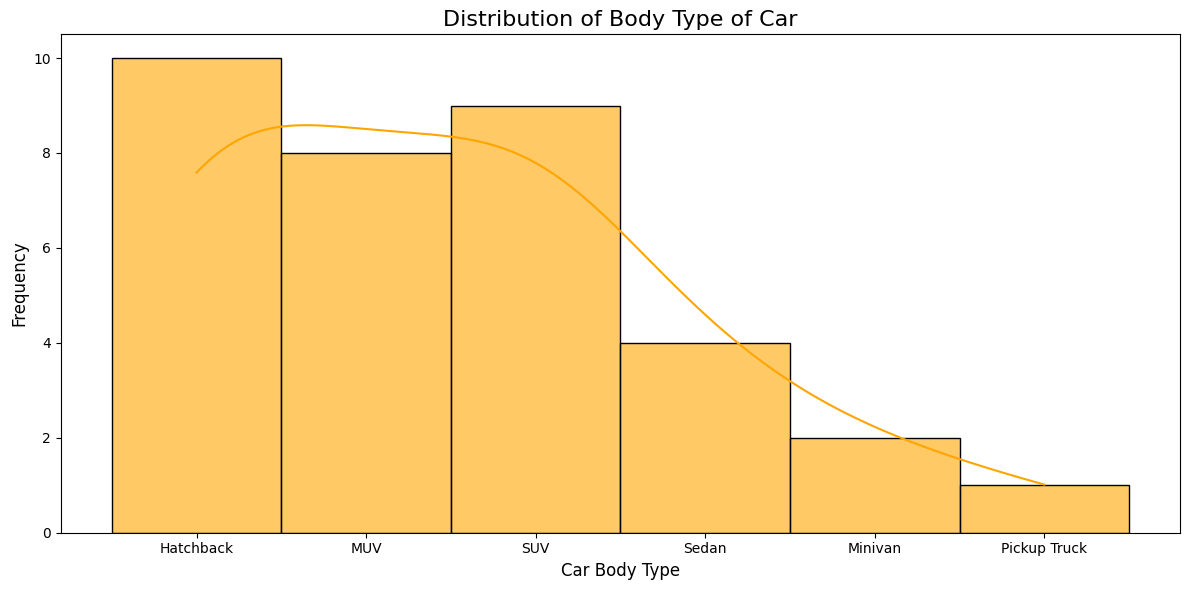

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Body Type'], bins=10, kde=True, color='orange', edgecolor='black', alpha=0.6)

plt.title('Distribution of Body Type of Car', fontsize=16)
plt.xlabel('Car Body Type', fontsize=12)
# plt.xticks(rotation=90)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_26356\3354518095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


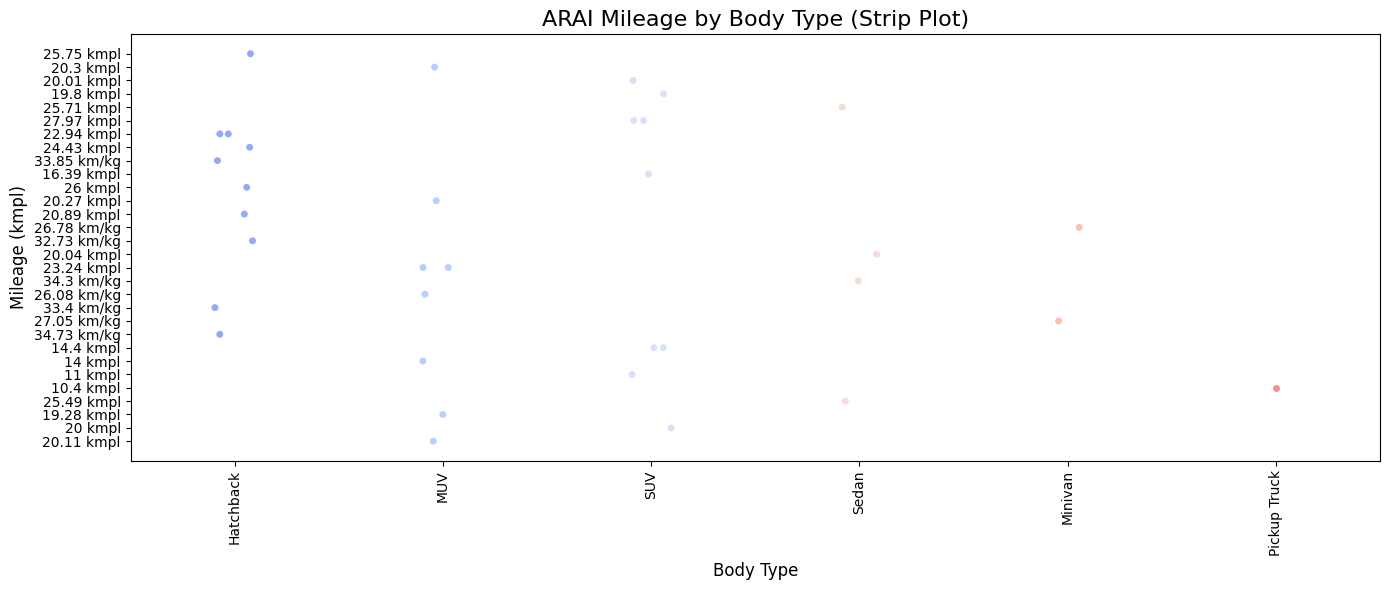

In [31]:
plt.figure(figsize=(14, 6))
sns.stripplot(
    x='Body Type',
    y='ARAI Mileage',
    data=df,
    jitter=True,
    size=5,
    palette='coolwarm',
    alpha=0.7
)
plt.title('ARAI Mileage by Body Type (Strip Plot)', fontsize=16)
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Mileage (kmpl)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_26356\2381472533.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\pavan\AppData\Local\Temp\ipykernel_26356\2381472533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


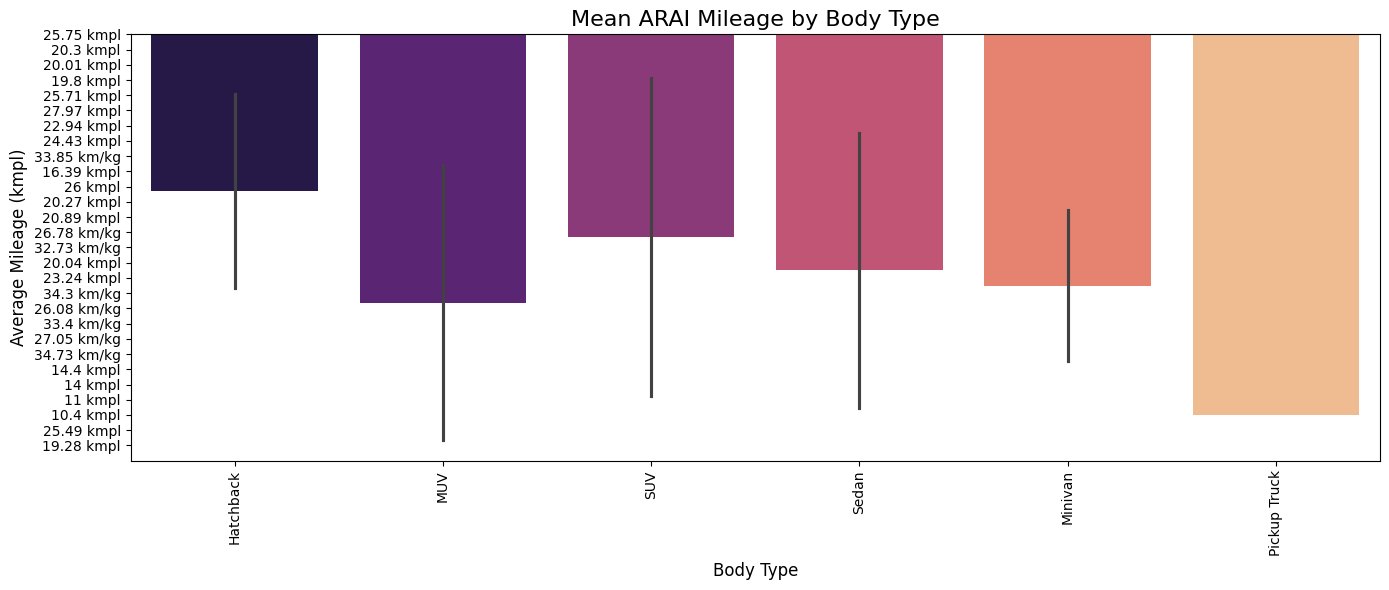

In [32]:
plt.figure(figsize=(14, 6))
sns.barplot(
    x='Body Type',
    y='ARAI Mileage',
    data=df,
    estimator='mean',
    ci='sd', 
    palette='magma'
)
plt.title('Mean ARAI Mileage by Body Type', fontsize=16)
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Average Mileage (kmpl)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Load Dependencies and Dataset

In [33]:
from PIL import Image
import requests
from io import BytesIO
import torch
import clip  # OpenAI's CLIP
from tqdm import tqdm

# Load CLIP Model

In [34]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Generate and Save Image Embeddings

In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

df = pd.read_csv("CarsDataset.csv")
image_embeddings = []

for i, row in df.iterrows():
    image_path = row['Car Image']
    try:
        if image_path.startswith("http"):
            image = Image.open(BytesIO(urlopen(image_path).read())).convert("RGB")
        else:
            if not os.path.exists(image_path):
                print(f"Missing image: {image_path}")
                continue
            image = Image.open(image_path).convert("RGB")
        
        image_input = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            emb = model.encode_image(image_input)
            emb /= emb.norm(dim=-1, keepdim=True)
        image_embeddings.append(emb.cpu().numpy())

    except Exception as e:
        print(f"Failed for {image_path}: {e}")

image_embeddings = np.vstack(image_embeddings)
np.save("car_image_embeddings.npy", image_embeddings)
print("Embeddings saved.")


c:\Users\pavan\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Embeddings saved.


# Match User Uploaded Image with Dataset

In [37]:
def match_uploaded_image(uploaded_image, embeddings_array):
    img = Image.open(uploaded_image).convert("RGB")
    image_input = preprocess(img).unsqueeze(0).to(device)

    with torch.no_grad():
        uploaded_features = model.encode_image(image_input)
        uploaded_features /= uploaded_features.norm(dim=-1, keepdim=True)

    # Compute cosine similarity
    similarities = (embeddings_array @ uploaded_features.cpu().numpy().T).squeeze()
    best_idx = np.argmax(similarities)

    return best_idx, similarities[best_idx]

# Save Notebook and Integrate With Streamlit

In [ ]:
# importing Streamlit
import streamlit as st

# Add import for full details
cols_to_display = df.columns.tolist()

# Choose a car index manually for testing
best_idx = 0

# Instead of just showing name and price
st.write(df.iloc[best_idx][cols_to_display]) 


In [ ]:
st.write(row[cols_to_display])

# Add Similar Cars Section

In [ ]:
top5_idx = np.argsort(similarities)[-5:][::-1]
for idx in top5_idx:
    st.image(df.iloc[idx]['Car Image'], caption=df.iloc[idx]['Car Name'])
    st.write(df.iloc[idx][cols_to_display])

# Deploy Flow

In [ ]:
dataset_embeddings = np.load("car_image_embeddings.npy")